In [1]:
import pandas as pd

df = pd.read_csv("insurance.csv")

print(df.head())
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df[col] = le.fit_transform(df[col])

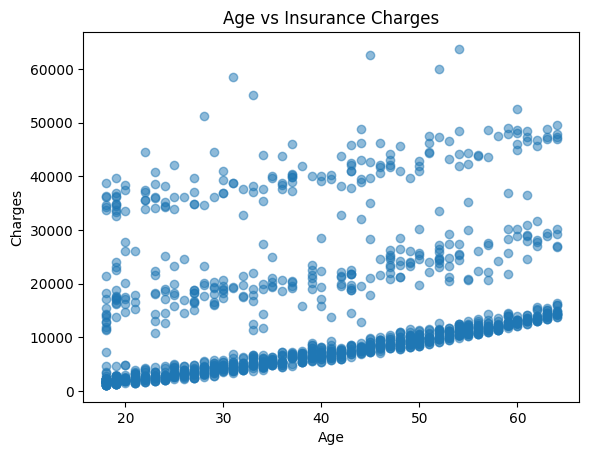

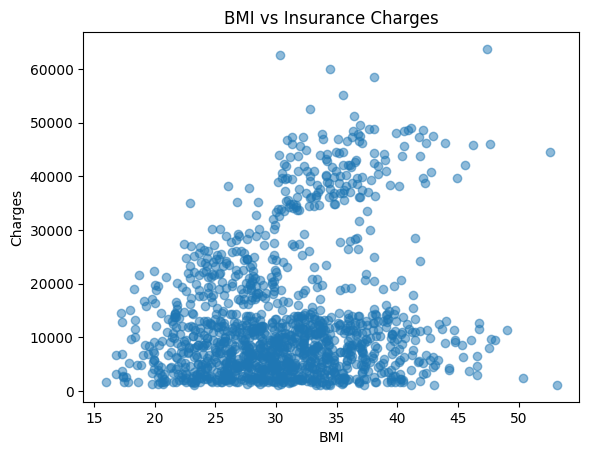

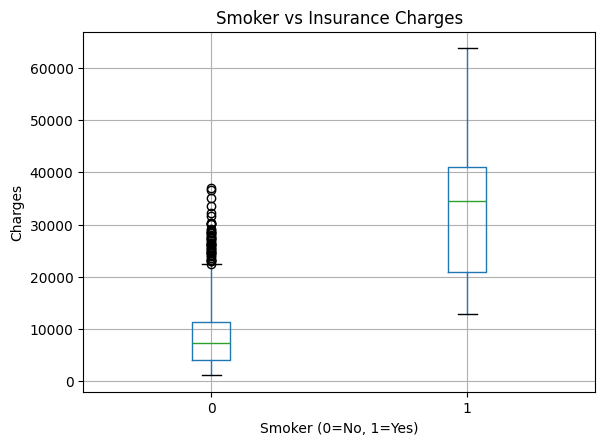

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['charges'], alpha=0.5)
plt.title('Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.title('BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

df.boxplot(column='charges', by='smoker')
plt.title('Smoker vs Insurance Charges')
plt.suptitle('')
plt.xlabel('Smoker (0=No, 1=Yes)')
plt.ylabel('Charges')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Mean Absolute Error (MAE):", mae)
print("✅ Root Mean Squared Error (RMSE):", rmse)

✅ Mean Absolute Error (MAE): 4186.508898366434
✅ Root Mean Squared Error (RMSE): 5799.587091438356


Factor	   Impact on Charges
Age	Older = higher charges
BMI	Higher BMI = more likely to have higher charges
Smoker	Smokers have dramatically higher charges